# Minority Game Basic


In [15]:
import numpy as np
import networkx as nx
import random
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

## Helper functions

In [42]:
def integer_state(history):
    """
    maps a list of m combinations of 1s and -1s to a unique number
    INPUT| a list of the last m outputs of the game
    OUTPUT| a unique integer
    """
    state = 0
    p = len(history)-1
    for i in history:
        if i == 1:
            state += 2**p
        p -= 1
    return state
def maximum_index(score):
    """
    Returns the index of the maximum score (if more than one max, selects randomly)
    """
    maximos = np.argwhere(score == np.amax(score)).flatten()
    return np.random.choice(maximos)

def minority(A):
    """
    Return the winner action
    """
    if A < 0:
        return 1
    elif A > 0:
        return -1
    else:
        return 2*random.randint(0, 1)-1

def update_scores(N, S, A, strategies, state, scores, winner):
    for n in range(N):
        for s in range(S):
            if strategies[n][s][state] == winner:
                scores[n][s] += 1  # g[A(t)] = sign(A(t))
                #scores[n][s] += A
            else:
                scores[n][s] -= 1  # g[A(t)] = sign(A(t))
                #scores[n][s] += A
    return scores

def one_game(N, S, strategies, history, scores):
    actions = np.zeros(N)
    state = integer_state(history)
    for i in range(N):
        index_strategy = maximum_index(scores[i])
        actions[i] = strategies[i][index_strategy][state]
    A = np.sum(actions)
    winner = minority(A)
    scores = update_scores(N, S, A, strategies, state, scores, winner)
    history = np.concatenate((history[1:], [winner]))
    return A, history, scores

def one_simulation(N, S, M, T, imprime=10**8):
    history = 2*np.random.randint(2, size=M)-1
    strategies = 2*np.random.randint(2, size=(N, S, 2**M))-1
    scores = np.zeros((N, S))
    attendances = np.zeros(T)
    times = np.zeros(T)
    meanA = np.zeros(T)  # to control the convergence
    # simulation
    for t in range(T):
        if (t+1) % imprime == 0:
            print('         t={}/{}'.format(t+1, T))
        A, history, scores = one_game(N, S, strategies, history, scores)
        times[t] = t
        attendances[t] = A
        meanA[t] = np.mean(attendances[:t+1])  # mean of the attendance so far
    return times, attendances, meanA


In [43]:
N1 = 501 #num of agents
S1 = 2 #strategy
M1 = 3 #memory
times, attendances, meanA = one_simulation(N1, S1, M1, T=5000, imprime = 500)

         t=500/5000
         t=1000/5000
         t=1500/5000
         t=2000/5000
         t=2500/5000
         t=3000/5000
         t=3500/5000
         t=4000/5000
         t=4500/5000
         t=5000/5000


In [50]:
history = 2*np.random.randint(2, size=M1)-1
strategies = 2*np.random.randint(2, size=(N1, S1, 2**M1))-1
print(history)
print(strategies)

[ 1 -1  1]
[[[-1 -1  1 ...  1  1  1]
  [-1 -1  1 ... -1 -1  1]]

 [[-1 -1 -1 ...  1  1  1]
  [ 1 -1 -1 ... -1  1  1]]

 [[-1  1  1 ...  1  1 -1]
  [ 1  1  1 ... -1 -1 -1]]

 ...

 [[ 1 -1 -1 ...  1 -1 -1]
  [-1 -1  1 ...  1  1  1]]

 [[-1 -1  1 ... -1 -1  1]
  [-1  1 -1 ... -1 -1 -1]]

 [[ 1  1 -1 ... -1 -1 -1]
  [ 1 -1 -1 ... -1 -1  1]]]


Text(0, 0.5, '<A(t)>')

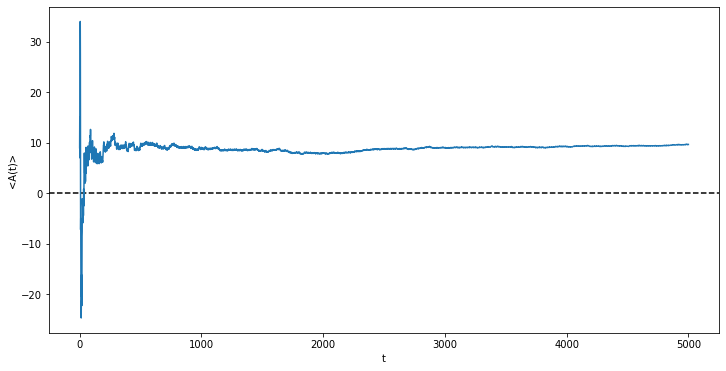

In [45]:
fig, ax = plt.subplots(figsize = (12,6))

ax.axhline(y=0, color='k', linestyle='--')
ax.plot(times, meanA, '-', label = r'$<A(t)>$')
ax.set_xlabel('t')
ax.set_ylabel('<A(t)>')